In [1]:
import numpy as np
import pandas as pd
import collections

import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.graph_objects as go
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import scipy
import math
import nltk

np.set_printoptions(suppress=True)

%matplotlib inline


# Reading a text-based dataset into pandas

In [2]:
data_file = pd.read_csv('/Users/chutingyan/Downloads/twitter-spam-detection/train.csv', encoding='latin-1')
data_file.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam


In [3]:
data_file

,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam
...,...,...,...,...,...,...,...,...
11963,7866,11:11 meet harry,0.0,0.0,0.0,0.0,NaN,Quality
11964,7841,If BBC Food disappears the loss of knowledge w...,0.0,0.0,NaN,0.0,"London, N4",Quality
11965,9090,Look What Liberals Did to This Historic Monume...,0.0,2.0,1192.0,0.0,honeymoon Ã£ve,Spam
11966,6818,"I uploaded a new track, ""Everyday Lite 1"", on ...",0.0,0.0,0.0,0.0,Mega Manila,Quality


In [4]:
data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11968 entries, 0 to 11967
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          11968 non-null  int64  
 1   Tweet       11968 non-null  object 
 2   following   11823 non-null  float64
 3   followers   11952 non-null  float64
 4   actions     9195 non-null   float64
 5   is_retweet  11967 non-null  float64
 6   location    10317 non-null  object 
 7   Type        11968 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 748.1+ KB


# Counting Data based on Spam/ Ham label

In [5]:
# count of ham and spam
data_file['Type'].value_counts()

Quality    6153
Spam       5815
Name: Type, dtype: int64

In [6]:
ham_df = data_file['Type'] == 'Quality' 
spam_df = data_file['Type'] == 'Spam' 
print("Number of Ham tweets:",ham_df.value_counts())

Number of Ham tweets: True     6153
False    5815
Name: Type, dtype: int64


In [7]:
# convert categorical v1 to numerical with new column
# number 0 represents ham, number 1 represents spam
data_file['Type_nm'] = data_file.Type.map({'Quality':0, 'Spam':1})
data_file.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type,Type_nm
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality,0
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality,0
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality,0
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam,1
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam,1


# Hist plot for numbers of ham and spam

In [8]:
# interactive plotly hist plot for numerical vi_nm columns(i,e ham and spam)
# ham is 0, spam is 1. We have more ham than spam
data_file['Type_nm'].iplot(kind='hist')

In [9]:
# creating a new column with message length using v2 column
data_file['Tweet_le'] = data_file.Tweet.apply(len)
data_file.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type,Type_nm,Tweet_le
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality,0,84
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality,0,141
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality,0,55
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam,1,105
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam,1,92


# Histogram plot for spam and ham labels with respect to message length

Text(0.5, 0, 'Message length')

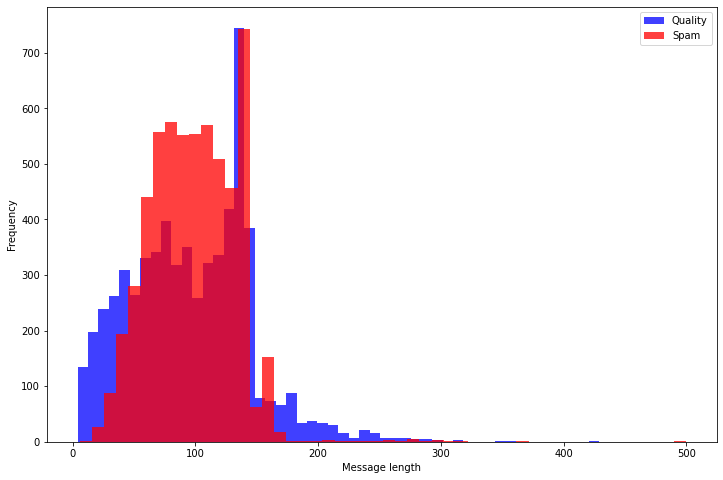

In [10]:
# Histogram plot for spam and ham labels with respect to message length
plt.figure(figsize=(12,8))
data_file[data_file['Type']=='Quality'].Tweet_le.plot(bins = 50, kind= 'hist', color='blue', label='Quality', alpha=0.75)
data_file[data_file['Type']=='Spam'].Tweet_le.plot(bins=50, kind= 'hist', color='red', label = 'Spam', alpha=0.75)
plt.legend()
plt.xlabel('Message length')

In [11]:
# describe the ham for some numerical insights
data_file[data_file['Type']=='Quality'].describe()

,Id,following,followers,actions,is_retweet,Type_nm,Tweet_le
count,6153.000000,6.008000e+03,6.137000e+03,3380.000000,6152.000000,6153.0,6153.000000
mean,6322.284577,4.738299e+03,7.068659e+05,98.590237,0.074447,0.0,96.238908
std,3662.500453,4.384309e+04,5.523657e+06,270.252897,0.262519,0.0,49.798043
min,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,4.000000
25%,3129.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,58.000000
50%,6370.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,96.000000
75%,9497.000000,0.000000e+00,1.480000e+04,26.000000,0.000000,0.0,134.000000
max,12598.000000,1.600000e+06,1.050000e+08,1800.000000,1.000000,0.0,429.000000


In [12]:
# describe the spam some numerical insights
data_file[data_file['Type']=='Spam'].describe()

,Id,following,followers,actions,is_retweet,Type_nm,Tweet_le
count,5815.000000,5815.000000,5815.000000,5815.000000,5815.000000,5815.0,5815.000000
mean,6260.518487,4837.541187,8060.115907,11508.887360,0.382115,1.0,98.645056
std,3600.547098,6496.941075,11853.194582,19518.139013,0.485946,0.0,34.623369
min,1.000000,0.000000,0.000000,2.000000,0.000000,1.0,6.000000
25%,3169.500000,857.000000,805.000000,1767.000000,0.000000,1.0,73.000000
50%,6214.000000,2836.000000,2264.000000,4784.000000,0.000000,1.0,98.000000
75%,9369.500000,6532.500000,13257.000000,14438.500000,1.000000,1.0,125.000000
max,12597.000000,75995.000000,143136.000000,165865.000000,1.000000,1.0,500.000000


In [13]:
# describe the both numerical columns
data_file.describe()

,Id,following,followers,actions,is_retweet,Type_nm,Tweet_le
count,11968.000000,1.182300e+04,1.195200e+04,9195.000000,11967.000000,11968.000000,11968.000000
mean,6292.273730,4.787110e+03,3.668763e+05,7314.563893,0.223949,0.485879,97.408005
std,3632.510153,3.158289e+04,3.973314e+06,16468.215132,0.416906,0.499821,43.112591
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,4.000000
25%,3150.750000,0.000000e+00,0.000000e+00,10.000000,0.000000,0.000000,67.000000
50%,6289.500000,5.100000e+01,8.415000e+02,1487.000000,0.000000,0.000000,97.000000
75%,9442.250000,3.635000e+03,1.328775e+04,7265.500000,0.000000,1.000000,130.000000
max,12598.000000,1.600000e+06,1.050000e+08,165865.000000,1.000000,1.000000,500.000000


In [14]:
# see in describe we have a 500 length word message, let's look at it
data_file[data_file['Tweet_le']==500].Tweet.iloc[0]

"'@AFRICAisMankind @4f52de8ce59b4fc @MsKTweetsTruth @Marlon_Brando11 @IAMJamena @JudgeJoeBrownTV @Fresh_Flames1 @genedavis47 @JenBCurly @nyafromfire @JaivsJael @10kindredspirit @MinorityWEAreNT @Assad_Abdul @MzNatTurner @fyahlite @MalkiaBektemba @Oxrganic @DonnaDoni1 @sibiya29 @DebbieM9 @SusieNattibree @ArielTheGoddess @Asim_the_Great @angelaw676 @SuperNjoro @MindSexGuru @CNN MSNBC and CNN they're white supremacist organization. No different from FOXNews. They just disguised himself as Liberals.'"

# Text Pre-processing

In [15]:
import string 
import nltk
from nltk.corpus import stopwords

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chutingyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
import re,string

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # remove hashtag
    nopunc = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",nopunc).split())
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [18]:
# type of stopwords is a list
type(stopwords.words('english'))

list

In [19]:
# check the list of stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
# check all sets of punctuation
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


## Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

# Tokenize the messages

In [21]:
data_file['clean_msg'] = data_file.Tweet.apply(text_process)

In [22]:
data_file


,Id,Tweet,following,followers,actions,is_retweet,location,Type,Type_nm,Tweet_le,clean_msg
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality,0,84,everything else thats complicated PESummit PXp...
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality,0,141,Eren sent glare towards Mikasa nodded stood go...
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality,0,55,posted new photo Facebook httpfbme2Be7LiyuJ
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam,1,105,jan Idiot Chelsea Handler Diagnoses Trump Dise...
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam,1,92,Pedophile Anthony Weiner TERRIFIED Getting Bea...
...,...,...,...,...,...,...,...,...,...,...,...
11963,7866,11:11 meet harry,0.0,0.0,0.0,0.0,NaN,Quality,0,16,1111 meet harry
11964,7841,If BBC Food disappears the loss of knowledge w...,0.0,0.0,NaN,0.0,"London, N4",Quality,0,123,BBC Food disappears loss knowledge catastrophi...
11965,9090,Look What Liberals Did to This Historic Monume...,0.0,2.0,1192.0,0.0,honeymoon Ã£ve,Spam,1,108,Look Liberals Historic Monument Arizona httpst...
11966,6818,"I uploaded a new track, ""Everyday Lite 1"", on ...",0.0,0.0,0.0,0.0,Mega Manila,Quality,0,168,uploaded new track Everyday Lite 1 spreaker li...


In [23]:
#print the most common ham words that appears more than 50 times
from collections import Counter

words = data_file[data_file['Type']=='Quality'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))   

[('like', 225), ('new', 208), ('love', 196), ('get', 185), ('happy', 157), ('know', 152), ('one', 152), ('day', 151), ('good', 137), ('via', 136), ('today', 127), ('time', 122), ('people', 113), ('need', 111), ('us', 111), ('go', 107), ('please', 107), ('got', 103), ('want', 102), ('thank', 95), ('think', 95), ('birthday', 94), ('cant', 94), ('see', 93), ('really', 89), ('make', 88), ('life', 87), ('back', 85), ('may', 81), ('great', 80), ('last', 79), ('thanks', 78), ('much', 78), ('video', 78), ('even', 77), ('would', 75), ('never', 75), ('best', 75), ('still', 74), ('always', 73), ('first', 72), ('feel', 72), ('lol', 72), ('help', 70), ('going', 70), ('right', 69), ('work', 69), ('1', 69), ('way', 68), ('say', 68)]


In [24]:
clean_tweets = pd.DataFrame(ham_words.most_common(15),
                             columns=['words', 'count'])
clean_tweets.head()

,words,count
0,like,225
1,new,208
2,love,196
3,get,185
4,happy,157


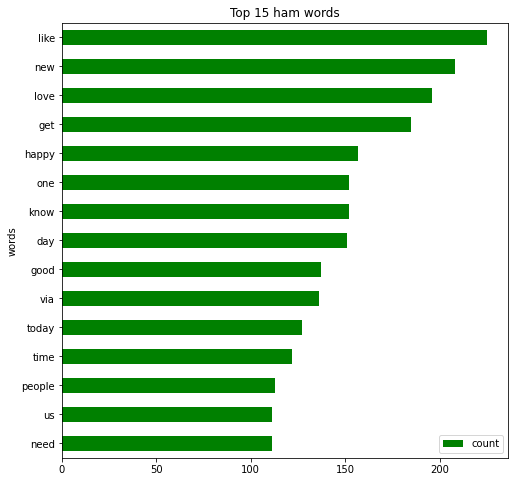

In [25]:


#plot the top 15 ham words
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")
ax.set_title("Top 15 ham words")
plt.show()

In [26]:
#print the most common spam words that appears more than 50 times
words = data_file[data_file.Type=='Spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)
    
print(spam_words.most_common(50))

[('news', 515), ('trump', 485), ('rt', 301), ('police', 201), ('us', 189), ('new', 189), ('man', 165), ('breaking', 156), ('world', 149), ('people', 142), ('obama', 141), ('sports', 138), ('politics', 134), ('black', 131), ('amp', 121), ('says', 120), ('one', 114), ('get', 114), ('president', 107), ('video', 101), ('clinton', 99), ('like', 98), ('via', 97), ('local', 96), ('hillary', 96), ('state', 96), ('white', 91), ('day', 85), ('killed', 85), ('house', 77), ('woman', 75), ('trumps', 73), ('media', 73), ('would', 73), ('america', 72), ('topnews', 72), ('go', 71), ('back', 69), ('fire', 67), ('say', 66), ('shooting', 64), ('gop', 61), ('know', 60), ('vote', 60), ('dead', 60), ('first', 58), ('shot', 58), ('maga', 57), ('court', 57), ('crash', 57)]


In [27]:
clean_spam = pd.DataFrame(spam_words.most_common(15),
                             columns=['words', 'count'])
clean_spam.head()

,words,count
0,news,515
1,trump,485
2,rt,301
3,police,201
4,us,189


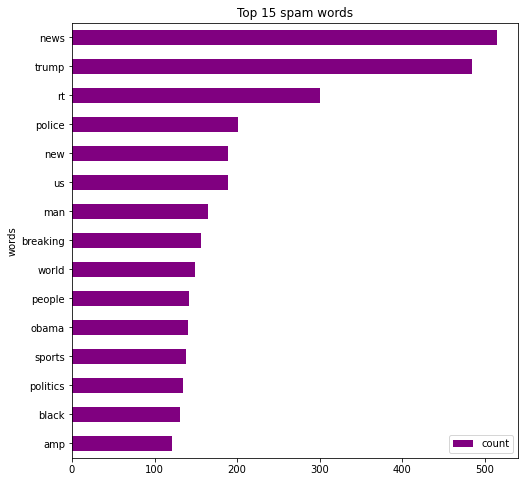

In [28]:
#plot the top 15 spam words
fig, ax = plt.subplots(figsize=(8, 8))
clean_spam.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")
ax.set_title("Top 15 spam words")
plt.show()

# Vectorization

In [29]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = data_file.clean_msg
y = data_file.Type_nm
print(X.shape)
print(y.shape)

(11968,)
(11968,)


In [30]:
# split X and y into training and testing sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8976,)
(2992,)
(8976,)
(2992,)


## There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the analyzer to be our own previously defined function:

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [32]:
# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)



# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

# examine the document-term matrix
X_train_dtm

<8976x26615 sparse matrix of type '<class 'numpy.int64'>'
	with 73928 stored elements in Compressed Sparse Row format>

In [33]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<2992x26615 sparse matrix of type '<class 'numpy.int64'>'
	with 18573 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<8976x26615 sparse matrix of type '<class 'numpy.float64'>'
	with 73928 stored elements in Compressed Sparse Row format>

# Building and evaluating a model using Naive Bayes

In [35]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [36]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 4.52 ms, sys: 1.7 ms, total: 6.22 ms
Wall time: 4.71 ms


MultinomialNB()

In [37]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [38]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.8218582887700535

[[1250  265]
 [ 268 1209]]


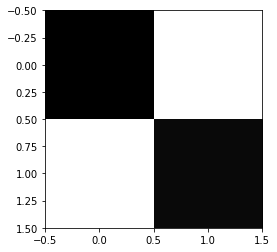

In [39]:
# print the confusion matrix
cm=metrics.confusion_matrix(y_test, y_pred_class)
print(cm)
plt.imshow(cm, cmap='binary')


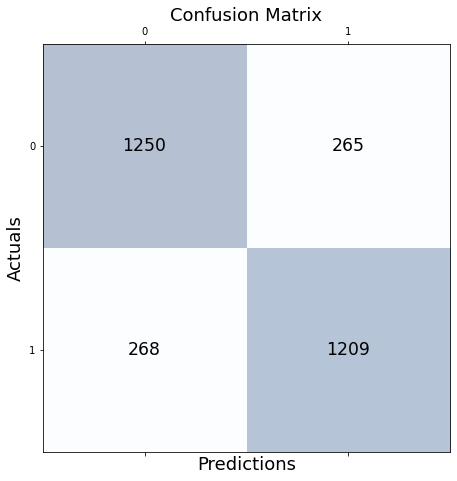

In [40]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [41]:
def comfusion_matrix_properties(mat):


    from sklearn.metrics import confusion_matrix

    mat = confusion_matrix(y_test,y_pred_class)
    print("Confusion Matrix:\n\n",mat,"\n")

    TP = mat[0][0]
    FP = mat[0][1]
    FN = mat[1][0]
    TN = mat[1][1]


    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print("True Positive Rate",round(TPR*100,2),"%")

    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    print("True Negative Rate",round(TNR*100,2),"%")

    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print("Positive Predictive Value",round(PPV*100,2),"%")

    # Negative predictive value
    NPV = TN/(TN+FN)
    print("Negative Predictive Value",round(NPV*100,2),"%")

    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print("False Positive Rate",round(FPR*100,2),"%")

    # False negative rate
    FNR = FN/(TP+FN)
    print("False Negative Rate",round(FNR*100,2),"%")

    # False discovery rate
    FDR = FP/(TP+FP)
    print("False Discovery Rate",round(FDR*100,2),"%")


    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print("Overall Accuracy",round(ACC*100,2),"%")

In [42]:
comfusion_matrix_properties(cm)

Confusion Matrix:

 [[1250  265]
 [ 268 1209]] 

True Positive Rate 82.35 %
True Negative Rate 82.02 %
Positive Predictive Value 82.51 %
Negative Predictive Value 81.86 %
False Positive Rate 17.98 %
False Negative Rate 17.65 %
False Discovery Rate 17.49 %
Overall Accuracy 82.19 %


In [43]:
# print message text for false positives (ham incorrectly classifier)
# X_test[(y_pred_class==1) & (y_test==0)]
X_test[y_pred_class > y_test]

5918     bikeregister tops half million httpmags4dorset...
7556     ALSO PROTESTING MONEY COP ONpictwittercomyyIee...
11118    Mngxitama blackopinion1 BLFSMUNISA BLFSMWits M...
1958     destruction property legitimate way protest Bu...
4421     Floyd Mayweather Reportedly Spends 10K Monthly...
                               ...                        
161      Presumptive nominee Know Nothing Party 2016htt...
6828     unforgettable deeply personal meticulously rep...
627      benign histiocytes LN sinuses comparison singl...
9359     JH1LMD1 Hachijo Island httpDXNewscom JH1LMD ac...
11856    Today Trudeau government tables bill ensure pr...
Name: clean_msg, Length: 265, dtype: object

In [44]:
# example of false positive 
X_test[4326]

'UK Labour httpifttt1ThYEd0 Andy Burnham addresses Police Federation conference BetterPlan'

In [45]:
# print message text for false negatives (spam incorrectly classifier)
X_test[y_pred_class < y_test]

3733                   Chew mouth open BeUnclassyIn4Words
8979    Miami Dolphins Announce Hard Rock Stadium Scri...
6503                         FearAMovie Fight Flight Club
8079                                   Humoritarian weird
2161    islamlie2 Castruccio64 gasparripdl ameluzzi ma...
                              ...                        
802                  Game Day GoGators httpstcoQmAe2ddIuw
6696    Chilling pages Aurora mass shooters diary debu...
6569    TBT ThomasHitManHearns SugarRayLeonard Evander...
4017    FollowFriday wingheart lamiliengel putyrdreams...
411     Ive Missed LostIn3Words RIP Belle httpstcoY69t...
Name: clean_msg, Length: 268, dtype: object

In [46]:
# example of false negative 
X_test[411]

'Ive Missed LostIn3Words RIP Belle httpstcoY69tnf5slC'

In [47]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.45403722, 0.16980885, 0.01252974, ..., 0.00318901, 0.00599657,
       0.81410966])

In [48]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.894767066415511

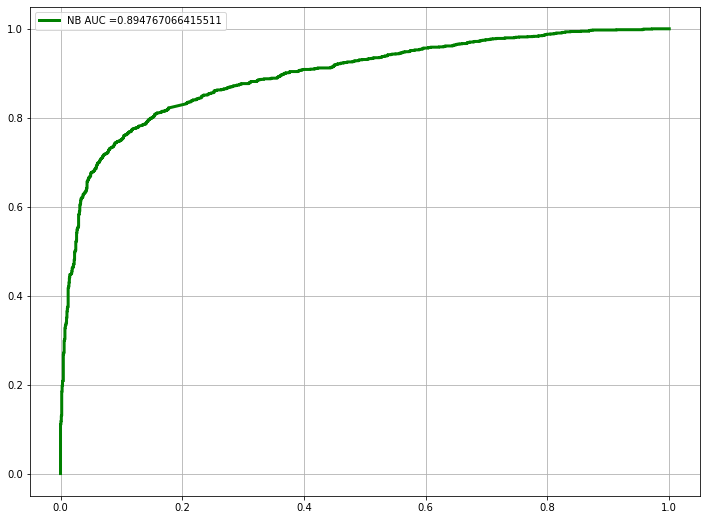

In [49]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

plt.figure(figsize=(12,9))
y_pred_proba_mnb = nb.predict_proba(X_test_dtm)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_mnb)
auc = metrics.roc_auc_score(y_test, y_pred_proba_mnb)
multinomial_naive_bayes_model_object={}
multinomial_naive_bayes_model_object['fpr']=fpr
multinomial_naive_bayes_model_object['tpr']=tpr
multinomial_naive_bayes_model_object['auc']=auc

plt.plot(fpr,tpr,label="NB AUC ="+str(auc), lw=3,color='green')

plt.legend()
plt.grid()
plt.show()

In [50]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', MultinomialNB())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model', MultinomialNB())])

In [51]:
y_pred = pipe.predict(X_test)

In [52]:
metrics.accuracy_score(y_test, y_pred)


0.8155080213903744

In [53]:
metrics.confusion_matrix(y_test, y_pred)

array([[1262,  253],
       [ 299, 1178]])

[[1262  253]
 [ 299 1178]]


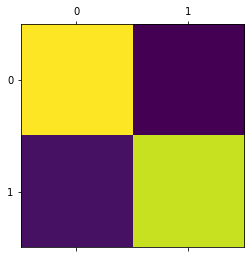

In [54]:
mc2 = metrics.confusion_matrix(y_test, y_pred)
print(mc2)
plt.matshow(mc2)

# Exploring existance of null values

In [55]:
data_file.isnull().sum()

Id               0
Tweet            0
following      145
followers       16
actions       2773
is_retweet       1
location      1651
Type             0
Type_nm          0
Tweet_le         0
clean_msg        0
dtype: int64

## We observe that many features have null values, which need to be removed from the dataset

In [56]:
data_file.isnull().sum()

Id               0
Tweet            0
following      145
followers       16
actions       2773
is_retweet       1
location      1651
Type             0
Type_nm          0
Tweet_le         0
clean_msg        0
dtype: int64

# Extracting Features

## is_retweet is a binary variable. If the posted tweet contains retweet count,

## is_retweet = 1.0, else 0.0

In [57]:
#retweet_count

is_retweet_count = []

for i in range(0,len(data_file)):
    if(data_file.is_retweet.iloc[i] == 0.0):
        is_retweet_count.append(0)
    else:
        is_retweet_count.append(1)
    
data_file['is_retweet_count'] = is_retweet_count